In [ ]:
!pip install -q opendatasets
import matplotlib.pyplot as plt
import opendatasets as od
import numpy as np
import pandas as pd

In [ ]:
od.download("https://www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets?select=News+_dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: asamanikafalen
Your Kaggle Key: ··········


100%|██████████| 41.0M/41.0M [00:00<00:00, 43.1MB/s]


In [ ]:
df_fake=pd.read_csv("/content/fake-news-detection-datasets/News _dataset/Fake.csv")
df_true=pd.read_csv("/content/fake-news-detection-datasets/News _dataset/True.csv")

In [ ]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


**IMPORTING THE NECESSARY LIBRARIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras import Sequential
from keras.layers import Embedding, Dense, LSTM
from keras.preprocessing.text import one_hot
from keras.utils import pad_sequences
import nltk
from nltk.stem.snowball import SnowballStemmer
import regex as re
from nltk.tokenize import sent_tokenize
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords

**PREPROCESSING**

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df_true['status'] = 0
df_fake['status'] = 1

In [ ]:
df = pd.concat([df_true,df_fake])
df.drop(['subject','text','date'],axis=1,inplace=True)

In [ ]:
random_indexes = np.random.randint(0,len(df),len(df))
df = df.iloc[random_indexes].reset_index(drop=True)

In [ ]:
pd.set_option('display.max_colwidth', 500)
random = np.random.randint(0,len(df),20)
df.iloc[random]

,title,status
25419,Nigerian police official defends unit against brutality accusations,0
20088,U.S. House to vote on non-nuclear Iran sanctions next week,0
38256,WATCH: Republican Strategist BLASTS ‘Lawless’ Trump,1
27043,Nigeria asks Britain for gear to fight Islamists: Johnson,0
18410,EXPOSE THE LIES: Shut Down Planned Parenthood’s Phone Lines,1
27444,U.S. conservative activist Phyllis Schlafly dead at 92,0
10456,Panama illegal drug seizures set to hit record in 2017: officials,0
34310,"CNN’S FAKE NEWS BACKFIRES! CNN Legal Analyst Agrees With Trump On FBI, DOJ: “Off the rails!” [Video]",1
43161,China urges restraint amid war of words between Trump and North Korea,0
6829,Senator Flake expects more Republicans to denounce Trump,0


In [ ]:
def longest_sentence_length(text):
  return len(text.split())

df['maximum_length'] = df['title'].apply(lambda x : longest_sentence_length(x))
max_length = max(df['maximum_length'].values)
print('longest sentence having length -',max_length)

longest sentence having length - 42


In [ ]:
text_cleaning = "\b0\S*|\b[^A-Za-z0-9]+"

def preprocess_filter(text, stem=False):
  text = re.sub(text_cleaning, " ",str(text.lower()).strip())
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        stemmer = SnowballStemmer(language='english')
        token = stemmer.stem(token)
      tokens.append(token)
  return " ".join(tokens)

In [ ]:
# Word embedding with pre padding
def one_hot_encoded(text,vocab_size=5000,max_length = 40):
    hot_encoded = one_hot(text,vocab_size)
    return hot_encoded

In [ ]:
# word embedding pipeline
def word_embedding(text):
    preprocessed_text=preprocess_filter(text)
    return one_hot_encoded(preprocessed_text)

In [ ]:
one_hot_encoded_title =df['title'].apply(lambda x : word_embedding(x)).values

In [ ]:
# padding to make the size equal of the sequences
padded_encoded_title = pad_sequences(one_hot_encoded_title,maxlen=max_length,padding = 'pre')

In [ ]:
# Splitting
X = padded_encoded_title
y = df['status'].values
y = np.array(y)

# shapes
print(X.shape)
print(y.shape)

(44898, 42)
(44898,)


In [ ]:
# Splitting into training, testing
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 42)

# Shape and size of train and test dataset
print('X train shape {}'.format(X_train.shape))
print('X test shape {}'.format(X_test.shape))
print('y train shape {}'.format(y_train.shape))
print('y test shape {}'.format(y_test.shape))

X train shape (33673, 42)
X test shape (11225, 42)
y train shape (33673,)
y test shape (11225,)


**LSTM**

In [ ]:
# Creating NN Model
embedded_features = 40
model = Sequential()
model.add(Embedding(5000,embedded_features,input_length = max_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer= 'adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 42, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Model training
# training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15,batch_size=64)

Epoch 1/15
527/527 [==============================] - 81s 146ms/step - loss: 0.2171 - accuracy: 0.9151 - val_loss: 0.1255 - val_accuracy: 0.9511
Epoch 2/15
527/527 [==============================] - 72s 136ms/step - loss: 0.0866 - accuracy: 0.9702 - val_loss: 0.1081 - val_accuracy: 0.9609
Epoch 3/15
527/527 [==============================] - 73s 139ms/step - loss: 0.0500 - accuracy: 0.9828 - val_loss: 0.1038 - val_accuracy: 0.9647
Epoch 4/15
527/527 [==============================] - 86s 163ms/step - loss: 0.0280 - accuracy: 0.9913 - val_loss: 0.1218 - val_accuracy: 0.9663
Epoch 5/15
527/527 [==============================] - 55s 105ms/step - loss: 0.0165 - accuracy: 0.9948 - val_loss: 0.1486 - val_accuracy: 0.9668
Epoch 6/15
527/527 [==============================] - 50s 95ms/step - loss: 0.0120 - accuracy: 0.9964 - val_loss: 0.1593 - val_accuracy: 0.9662
Epoch 7/15
527/527 [==============================] - 53s 101ms/step - loss: 0.0067 - accuracy: 0.9980 - val_loss: 0.1889 - val_acc

In [ ]:
# setting threshold value
def best_threshold_value(thresholds:list,X_test):
    accuracies = []
    for thresh in thresholds:
        ypred =model.predict(X_test)
        ypred = np.where(ypred> thresh,1,0)
        accuracies.append(accuracy_score(y_test,ypred))
    return pd.DataFrame({
        'Threshold': thresholds,
        'Accuracy' : accuracies
    })

In [ ]:
best_threshold_value([0.4,0.5,0.6,0.7,0.8,0.9], X_test)

351/351 [==============================] - 6s 16ms/step


,Threshold,Accuracy
0,0.4,0.966771
1,0.5,0.966949
2,0.6,0.967394
3,0.7,0.967305
4,0.8,0.967661
5,0.9,0.967929


In [ ]:
# Predictino value at threshold 0.4
y_pred = model.predict(X_test)
y_pred = np.where(y_pred >0.9, 1, 0)

351/351 [==============================] - 9s 26ms/step


In [ ]:
# Confusion matrix
print('Confusion matrix')
print(confusion_matrix(y_pred,y_test))
print('----------------')
print('Classification report')
print(classification_report(y_pred,y_test))

Confusion matrix
[[5254  222]
 [ 138 5611]]
----------------
Classification report
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      5476
           1       0.96      0.98      0.97      5749

    accuracy                           0.97     11225
   macro avg       0.97      0.97      0.97     11225
weighted avg       0.97      0.97      0.97     11225



In [ ]:
# input generator
def prediction_input_processing(text):
    encoded = word_embedding(text)
    padded_encoded_title = pad_sequences([encoded],maxlen=max_length,padding = 'pre')
    output = model.predict(padded_encoded_title)
    output = np.where(0.4>output,1,0)
    if output[0][0] == 1:
        return 'Yes this News is fake'
    return 'No, It is not fake'


In [ ]:
# predictions
prediction_input_processing('Americans are more concerned over Indians fake open source contribution')

1/1 [==============================] - 0s 28ms/step


'No, It is not fake'

In [ ]:
news = 'Trump Just Sent Michelle Obama a Bill She will Never Be able to pay in her lifetime'
prediction_input_processing(news)

1/1 [==============================] - 0s 48ms/step


'No, It is not fake'

**CNN**

Epoch 1/10
527/527 [==============================] - 30s 51ms/step - loss: 0.2209 - accuracy: 0.9102 - val_loss: 0.1066 - val_accuracy: 0.9620
Epoch 2/10
527/527 [==============================] - 28s 53ms/step - loss: 0.0636 - accuracy: 0.9798 - val_loss: 0.0945 - val_accuracy: 0.9696
Epoch 3/10
527/527 [==============================] - 24s 45ms/step - loss: 0.0208 - accuracy: 0.9940 - val_loss: 0.1138 - val_accuracy: 0.9686
Epoch 4/10
527/527 [==============================] - 23s 45ms/step - loss: 0.0079 - accuracy: 0.9977 - val_loss: 0.1388 - val_accuracy: 0.9694
Epoch 5/10
527/527 [==============================] - 23s 43ms/step - loss: 0.0038 - accuracy: 0.9992 - val_loss: 0.1587 - val_accuracy: 0.9732
Epoch 6/10
527/527 [==============================] - 22s 42ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.1868 - val_accuracy: 0.9711
Epoch 7/10
527/527 [==============================] - 24s 46ms/step - loss: 5.1766e-04 - accuracy: 0.9999 - val_loss: 0.1953 - val_accur

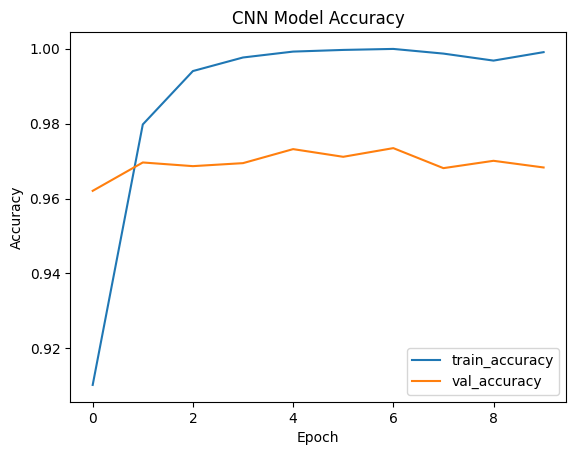

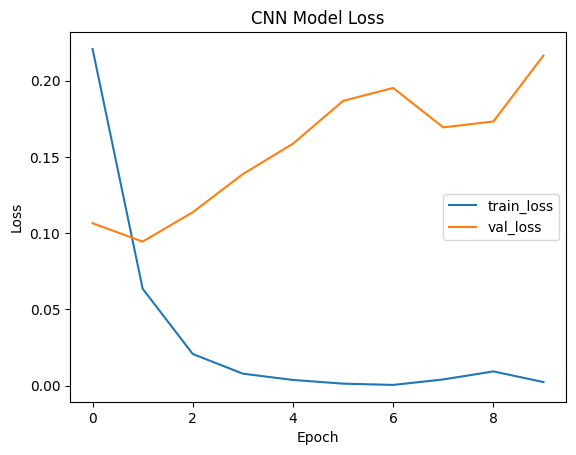

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

vocab_size = 5000
max_length = 42

# Define the CNN model
def create_cnn_model(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 100, input_length=max_length))
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Create and train the CNN model
cnn_model = create_cnn_model(vocab_size, max_length)
history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss, accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Loss: {loss:.4f}')

# Plot training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


**BIDIRECTIONAL LSTM**

Epoch 1/10
527/527 [==============================] - 90s 162ms/step - loss: 0.2031 - accuracy: 0.9206 - val_loss: 0.1075 - val_accuracy: 0.9605
Epoch 2/10
527/527 [==============================] - 81s 154ms/step - loss: 0.0763 - accuracy: 0.9730 - val_loss: 0.0933 - val_accuracy: 0.9693
Epoch 3/10
527/527 [==============================] - 78s 148ms/step - loss: 0.0408 - accuracy: 0.9872 - val_loss: 0.0922 - val_accuracy: 0.9727
Epoch 4/10
527/527 [==============================] - 66s 125ms/step - loss: 0.0213 - accuracy: 0.9938 - val_loss: 0.1053 - val_accuracy: 0.9694
Epoch 5/10
527/527 [==============================] - 66s 124ms/step - loss: 0.0137 - accuracy: 0.9959 - val_loss: 0.1213 - val_accuracy: 0.9716
Epoch 6/10
527/527 [==============================] - 76s 145ms/step - loss: 0.0103 - accuracy: 0.9967 - val_loss: 0.1385 - val_accuracy: 0.9716
Epoch 7/10
527/527 [==============================] - 66s 125ms/step - loss: 0.0061 - accuracy: 0.9981 - val_loss: 0.1514 - val_ac

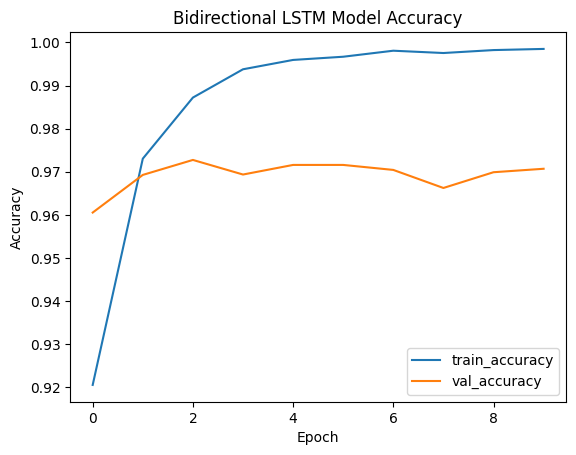

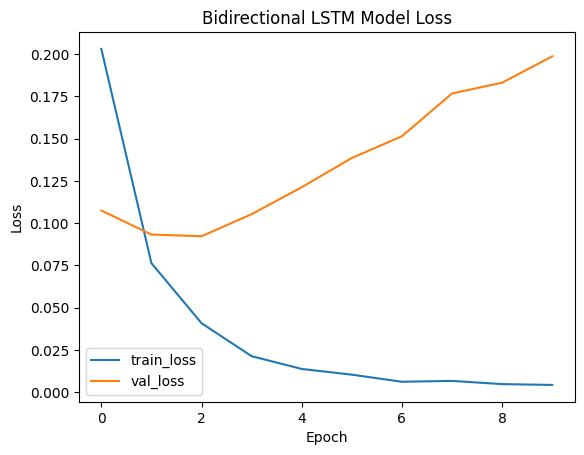

In [ ]:
from tensorflow.keras.layers import LSTM, Bidirectional

# Define the Bidirectional LSTM model
def create_bidirectional_lstm_model(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 100, input_length=max_length))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train the Bidirectional LSTM model
bidirectional_lstm_model = create_bidirectional_lstm_model(vocab_size, max_length)
history = bidirectional_lstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss, accuracy = bidirectional_lstm_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Loss: {loss:.4f}')

# Plot training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Bidirectional LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Bidirectional LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


**RESNET**

Epoch 1/10
527/527 [==============================] - 32s 50ms/step - loss: 0.5756 - accuracy: 0.7076 - val_loss: 0.5662 - val_accuracy: 0.7159
Epoch 2/10
527/527 [==============================] - 25s 48ms/step - loss: 0.5319 - accuracy: 0.7247 - val_loss: 0.5297 - val_accuracy: 0.7331
Epoch 3/10
527/527 [==============================] - 25s 47ms/step - loss: 0.5210 - accuracy: 0.7332 - val_loss: 0.5235 - val_accuracy: 0.7318
Epoch 4/10
527/527 [==============================] - 26s 50ms/step - loss: 0.5117 - accuracy: 0.7386 - val_loss: 0.5184 - val_accuracy: 0.7359
Epoch 5/10
527/527 [==============================] - 42s 80ms/step - loss: 0.5018 - accuracy: 0.7483 - val_loss: 0.5285 - val_accuracy: 0.7242
Epoch 6/10
527/527 [==============================] - 30s 56ms/step - loss: 0.4919 - accuracy: 0.7557 - val_loss: 0.5250 - val_accuracy: 0.7329
Epoch 7/10
527/527 [==============================] - 26s 50ms/step - loss: 0.4811 - accuracy: 0.7608 - val_loss: 0.5073 - val_accuracy:

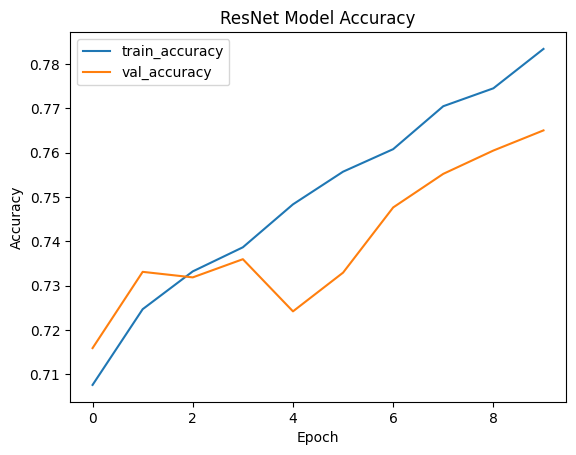

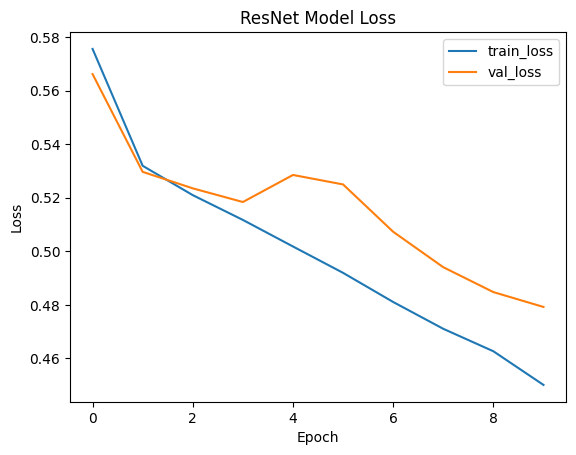

In [ ]:
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Activation, Add, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Model

# Define the Residual Block
def residual_block(x, filters, kernel_size, strides):
    y = Conv1D(filters, kernel_size, strides=strides, padding='same')(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = Conv1D(filters, kernel_size, padding='same')(y)
    y = BatchNormalization()(y)

    if strides != 1 or x.shape[-1] != filters:
        x = Conv1D(filters, 1, strides=strides, padding='same')(x)

    y = Add()([x, y])
    y = Activation('relu')(y)
    return y

# Define the ResNet model
def create_resnet_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv1D(64, 7, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size=3, strides=2, padding='same')(x)
    x = residual_block(x, filters=64, kernel_size=3, strides=1)
    x = residual_block(x, filters=64, kernel_size=3, strides=1)
    x = MaxPooling1D(pool_size=3, strides=2, padding='same')(x)
    x = residual_block(x, filters=128, kernel_size=3, strides=1)
    x = residual_block(x, filters=128, kernel_size=3, strides=1)
    x = MaxPooling1D(pool_size=3, strides=2, padding='same')(x)
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train the ResNet model
resnet_model = create_resnet_model(input_shape=(max_length, 1))
history = resnet_model.fit(X_train.reshape(-1, max_length, 1), y_train, epochs=10, batch_size=64, validation_data=(X_test.reshape(-1, max_length, 1), y_test), verbose=1)

# Evaluate the model
loss, accuracy = resnet_model.evaluate(X_test.reshape(-1, max_length, 1), y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Loss: {loss:.4f}')

# Plot training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('ResNet Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('ResNet Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


**COBRA**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Concatenate, Bidirectional, LSTM, Attention, Dense, Embedding
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score

# Load the dataset
df_true = pd.read_csv("/content/fake-news-detection-datasets/News _dataset/True.csv")
df_fake = pd.read_csv("/content/fake-news-detection-datasets/News _dataset/Fake.csv")


# Preprocess the data
df_true['status'] = 0
df_fake['status'] = 1
df = pd.concat([df_true, df_fake])
df.drop(['subject','text','date'], axis=1, inplace=True)
X = df['title']
y = df['status']

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

# Pad sequences
max_length = 42  # Adjust this based on your data
X = pad_sequences(X, maxlen=max_length)

# Define vocabulary size
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 to account for the padding token

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def create_cobra_model(max_length):
    input_layer = Input(shape=(max_length,))
    embedding_layer = Embedding(vocab_size, 100, input_length=max_length)(input_layer)
    lstm_layer = Bidirectional(LSTM(64, return_sequences=True))(embedding_layer)
    attention_layer = Attention()([lstm_layer, lstm_layer])
    concatenated_layer = Concatenate()([lstm_layer, attention_layer])
    output_layer = Dense(1, activation='sigmoid')(concatenated_layer)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train the COBRA model
cobra_model = create_cobra_model(max_length)
history = cobra_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)




Epoch 1/10
562/562 [==============================] - 129s 208ms/step - loss: 0.1612 - accuracy: 0.9386 - val_loss: 0.0810 - val_accuracy: 0.9703
Epoch 2/10
562/562 [==============================] - 121s 216ms/step - loss: 0.0423 - accuracy: 0.9867 - val_loss: 0.1022 - val_accuracy: 0.9689
Epoch 3/10
562/562 [==============================] - 109s 195ms/step - loss: 0.0195 - accuracy: 0.9939 - val_loss: 0.0978 - val_accuracy: 0.9695
Epoch 4/10
562/562 [==============================] - 102s 181ms/step - loss: 0.0116 - accuracy: 0.9965 - val_loss: 0.1272 - val_accuracy: 0.9722
Epoch 5/10
562/562 [==============================] - 95s 169ms/step - loss: 0.0092 - accuracy: 0.9973 - val_loss: 0.1285 - val_accuracy: 0.9702
Epoch 6/10
562/562 [==============================] - 101s 180ms/step - loss: 0.0086 - accuracy: 0.9975 - val_loss: 0.1196 - val_accuracy: 0.9718
Epoch 7/10
562/562 [==============================] - 94s 168ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.1461 - v

In [ ]:
y_test

799      1
6500     1
3590     1
1377     0
11059    1
        ..
20702    1
4068     0
1081     1
14658    0
15236    0
Name: status, Length: 8980, dtype: int64

In [ ]:
y_pred

array([[[9.9873698e-01],
        [9.9879485e-01],
        [9.9885619e-01],
        ...,
        [9.9999994e-01],
        [9.9999994e-01],
        [9.9999994e-01]],

       [[9.9997395e-01],
        [9.9997383e-01],
        [9.9997377e-01],
        ...,
        [9.9999988e-01],
        [1.0000000e+00],
        [1.0000000e+00]],

       [[9.9997550e-01],
        [9.9997532e-01],
        [9.9997526e-01],
        ...,
        [1.0000000e+00],
        [1.0000000e+00],
        [1.0000000e+00]],

       ...,

       [[9.9996758e-01],
        [9.9996740e-01],
        [9.9996740e-01],
        ...,
        [9.9999952e-01],
        [9.9999994e-01],
        [1.0000000e+00]],

       [[3.3004823e-04],
        [3.2668922e-04],
        [3.2482704e-04],
        ...,
        [2.9665744e-04],
        [4.4695719e-04],
        [7.1253802e-04]],

       [[8.6029794e-04],
        [8.6326024e-04],
        [8.7160023e-04],
        ...,
        [5.0858059e-04],
        [1.0858656e-04],
        [5.0579442e-04]]

In [ ]:
y_pred_int

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]])

In [ ]:
import numpy as np

y_pred_new = np.array(y_pred)
y_test_new = np.array(y_test)
y_pred_formatted = np.round(y_pred_new).astype(int)
y_pred_formatted = y_pred_formatted.squeeze()
y_pred_formatted = y_pred_formatted.reshape(-1)
y_pred_reshaped = y_pred_formatted.reshape(-1, 42)

# Calculate the mean along the second axis (axis=1) to reduce each set of 42 values to a single value
y_pred_mean = np.mean(y_pred_reshaped, axis=1)
y_pred_int = y_pred_mean.astype(int)



281/281 [==============================] - 7s 24ms/step
Test Accuracy: 0.9711581291759466


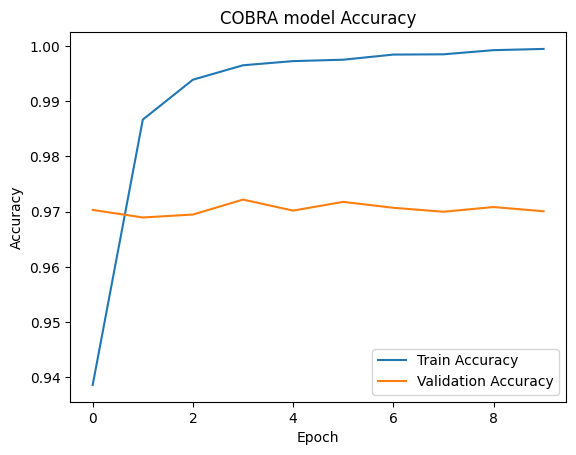

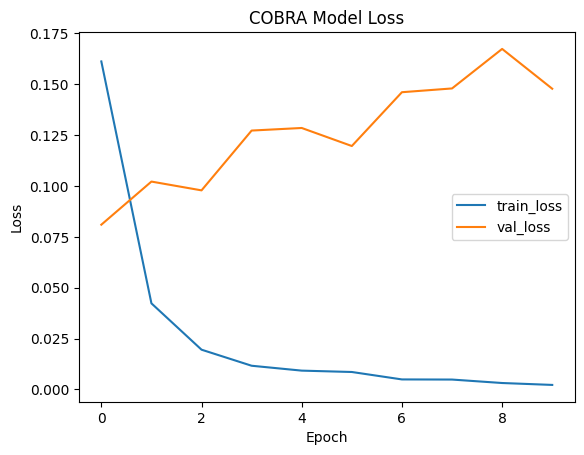

In [ ]:
# Evaluate the model
y_pred = cobra_model.predict(X_test)
accuracy = accuracy_score(y_test_new, y_pred_int)
print("Test Accuracy:", accuracy)

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('COBRA model Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('COBRA Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**GRU**

Epoch 1/10
562/562 [==============================] - 52s 89ms/step - loss: 0.1377 - accuracy: 0.9433 - val_loss: 0.0736 - val_accuracy: 0.9726
Epoch 2/10
562/562 [==============================] - 49s 87ms/step - loss: 0.0293 - accuracy: 0.9900 - val_loss: 0.0682 - val_accuracy: 0.9759
Epoch 3/10
562/562 [==============================] - 49s 87ms/step - loss: 0.0092 - accuracy: 0.9972 - val_loss: 0.0877 - val_accuracy: 0.9735
Epoch 4/10
562/562 [==============================] - 49s 88ms/step - loss: 0.0041 - accuracy: 0.9988 - val_loss: 0.1012 - val_accuracy: 0.9726
Epoch 5/10
562/562 [==============================] - 49s 87ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.1154 - val_accuracy: 0.9705
Epoch 6/10
562/562 [==============================] - 49s 88ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.1374 - val_accuracy: 0.9719
Epoch 7/10
562/562 [==============================] - 48s 86ms/step - loss: 0.0073 - accuracy: 0.9977 - val_loss: 0.1145 - val_accuracy:

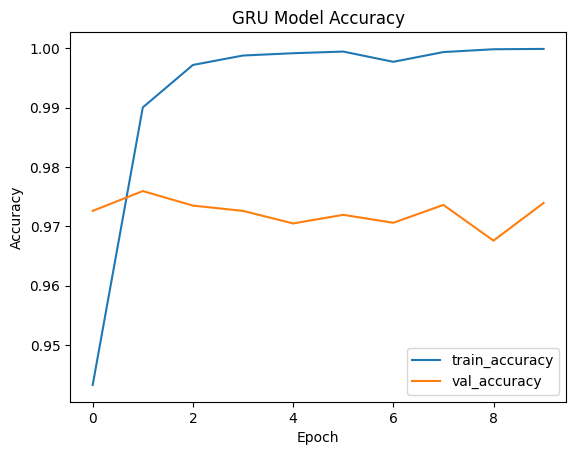

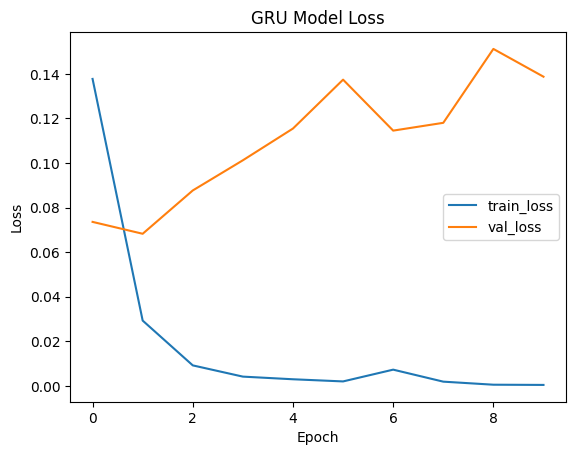

In [ ]:
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.models import Sequential

def create_gru_model(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 100, input_length=max_length))
    model.add(GRU(64))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

gru_model = create_gru_model(vocab_size, max_length)
history = gru_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)

loss, accuracy = gru_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Loss: {loss:.4f}')

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('GRU Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('GRU Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
